In [2]:
import pandas as pd

df_DST = pd.read_csv("../data/DST.csv")
df_K = pd.read_csv("../data/K.csv")
df_QB = pd.read_csv("../data/QB.csv")
df_RB = pd.read_csv("../data/RB.csv")
df_TE = pd.read_csv("../data/TE.csv")
df_WR = pd.read_csv("../data/WR.csv")

df_DST['Position'] = 'DST'
df_K['Position'] = 'K'
df_QB['Position'] = 'QB'
df_RB['Position'] = 'RB'
df_TE['Position'] = 'TE'
df_WR['Position'] = 'WR'

df = pd.concat([df_DST, df_K, df_QB, df_RB, df_TE, df_WR], ignore_index=True)

df.head()

,Rank,Player,SACK,INT,FR,FF,DEF TD,SFTY,SPC TD,G,...,TD,SACKS,ATT.1,YDS.1,TD.1,FL,20+,TGT,REC,Y/R
0,1.0,Houston Texans (HOU),33.0,12.0,7.0,8.0,2.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Los Angeles Rams (LAR),31.0,12.0,7.0,10.0,1.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Seattle Seahawks (SEA),36.0,9.0,4.0,3.0,2.0,0.0,2.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Cleveland Browns (CLE),42.0,9.0,6.0,10.0,2.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Pittsburgh Steelers (PIT),34.0,9.0,11.0,13.0,3.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(f"\nInfo del DataFrame:")
print(df.info())


Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      971 non-null    float64
 1   Player    971 non-null    object 
 2   SACK      32 non-null     float64
 3   INT       153 non-null    float64
 4   FR        32 non-null     float64
 5   FF        32 non-null     float64
 6   DEF TD    32 non-null     float64
 7   SFTY      32 non-null     float64
 8   SPC TD    32 non-null     float64
 9   G         971 non-null    float64
 10  FPTS      971 non-null    float64
 11  FPTS/G    971 non-null    float64
 12  ROST      971 non-null    object 
 13  Position  983 non-null    object 
 14  FG        62 non-null     float64
 15  FGA       62 non-null     float64
 16  PCT       183 non-null    float64
 17  LG        818 non-null    float64
 18  1-19      62 non-null     float64
 19  20-29     62 non-null     float64
 20  30-39     6

In [10]:
print(f"Total de filas: {len(df)}")

print(f"\nColumnas:")
print(df.columns.tolist())


Total de filas: 983

Columnas:
['Rank', 'Player', 'SACK', 'INT', 'FR', 'FF', 'DEF TD', 'SFTY', 'SPC TD', 'G', 'FPTS', 'FPTS/G', 'ROST', 'Position', 'FG', 'FGA', 'PCT', 'LG', '1-19', '20-29', '30-39', '40-49', '50+', 'XPT', 'XPA', 'CMP', 'ATT', 'YDS', 'Y/A', 'TD', 'SACKS', 'ATT.1', 'YDS.1', 'TD.1', 'FL', '20+', 'TGT', 'REC', 'Y/R']


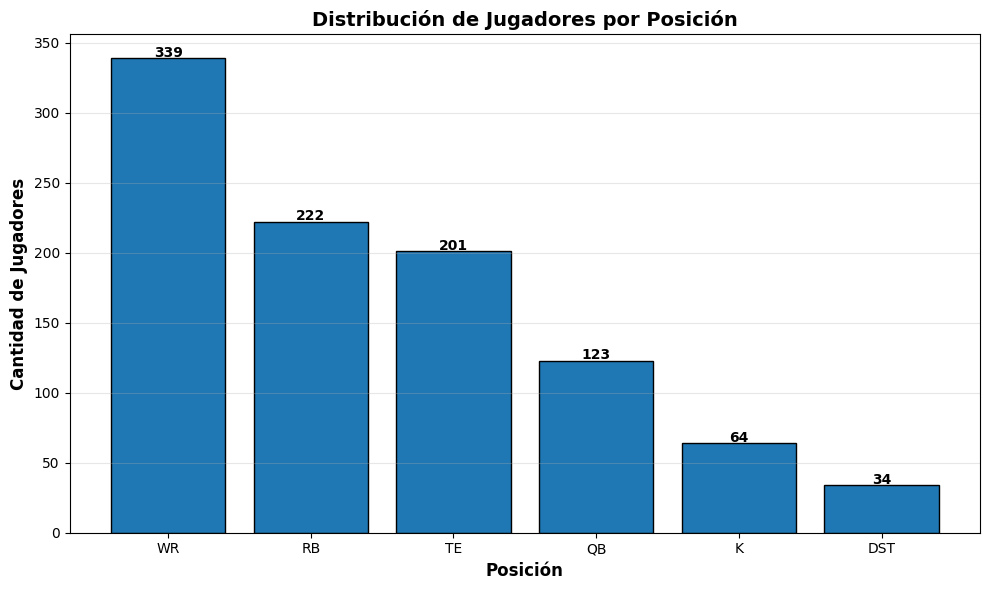

In [9]:
import matplotlib.pyplot as plt

pos_counts = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(pos_counts.index, pos_counts.values, edgecolor='black')

plt.xlabel('Posición', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Jugadores', fontsize=12, fontweight='bold')
plt.title('Distribución de Jugadores por Posición', fontsize=14, fontweight='bold')

for i, v in enumerate(pos_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


ANÁLISIS EXPLORATORIO DE DATOS - Defense position


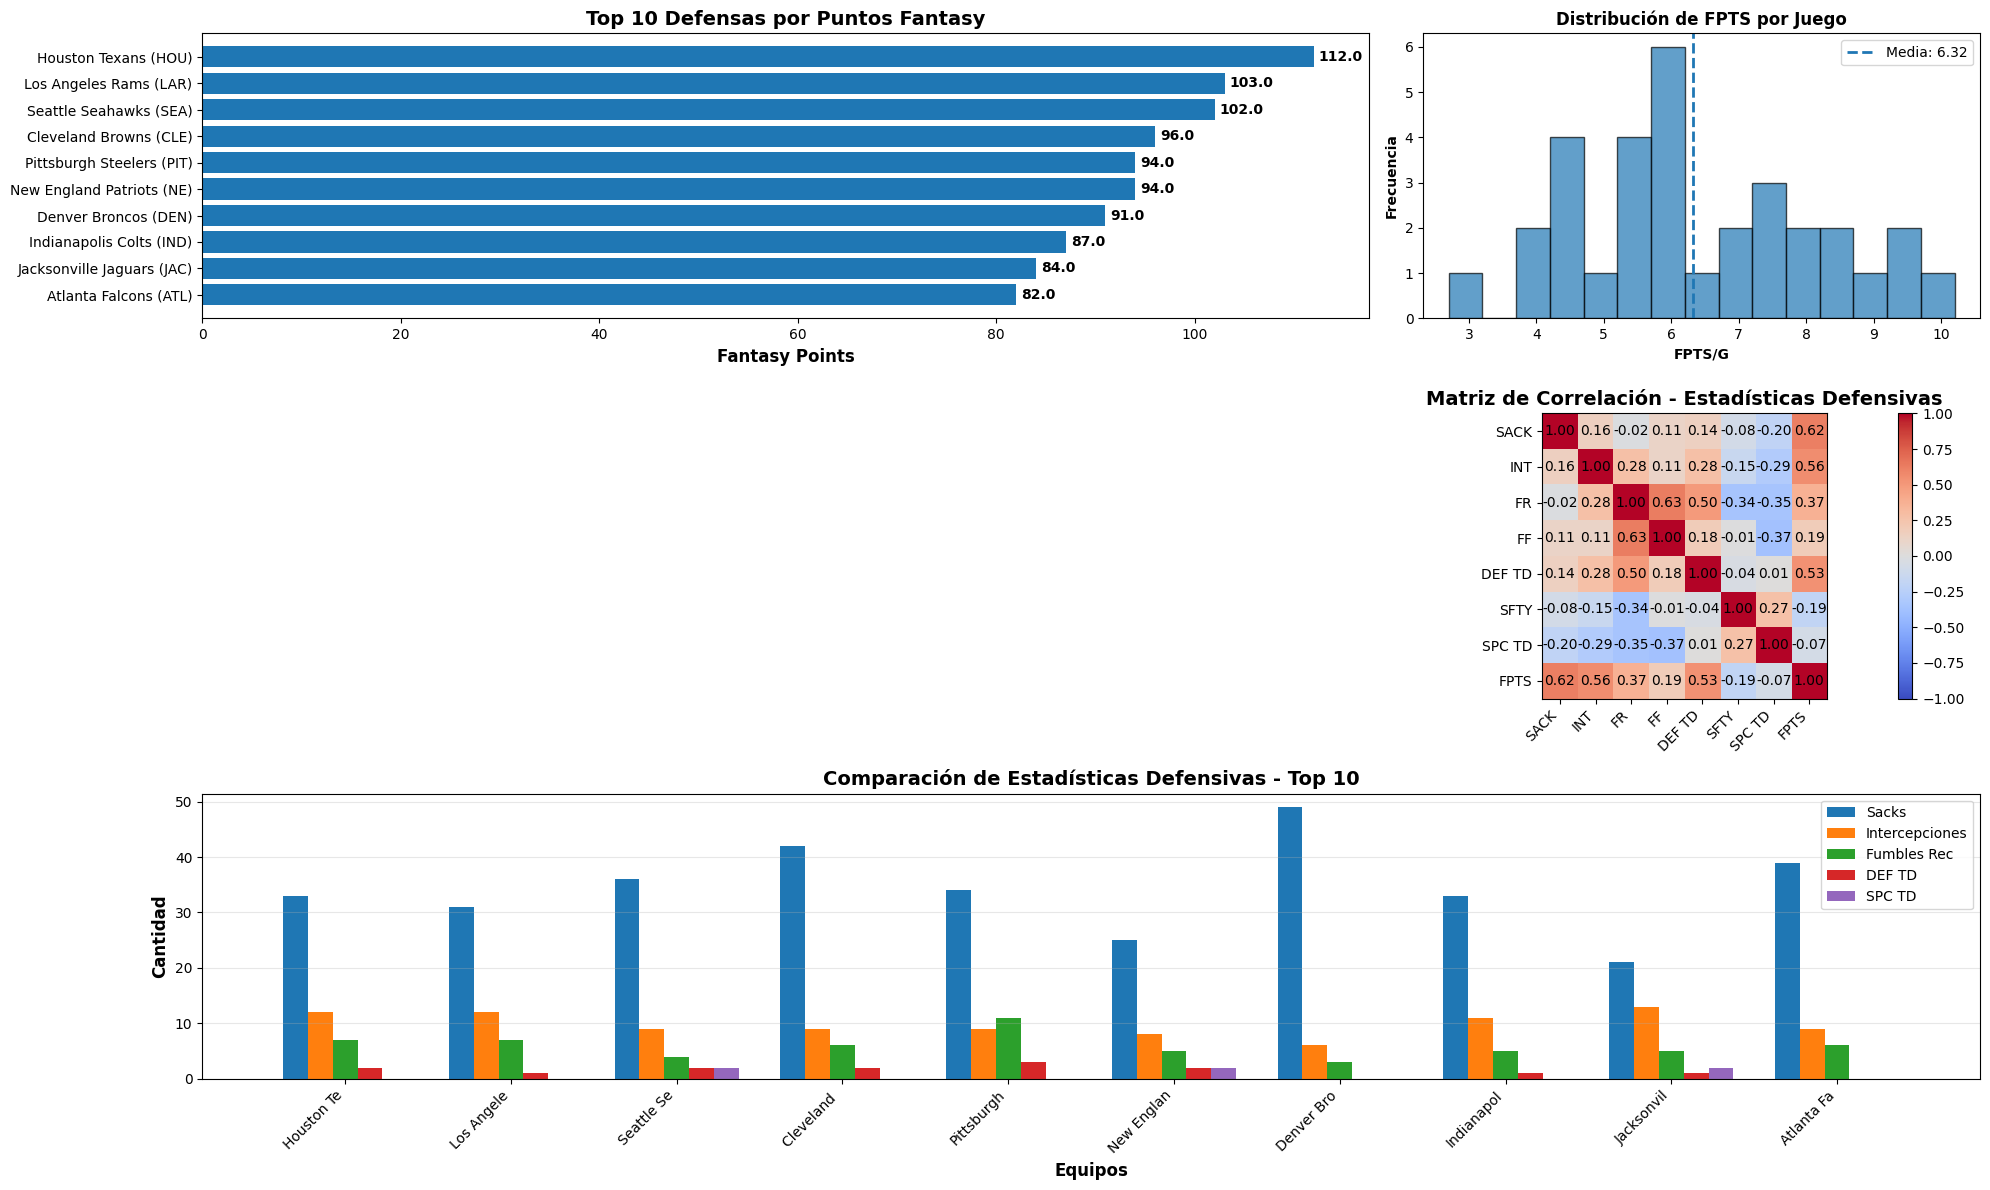

In [ ]:
import numpy as np
from matplotlib.gridspec import GridSpec

plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 10

print("=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Defense position")
print("=" * 100)

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :2])
top_dst_plot = df_DST.nlargest(10, 'FPTS')

ax1.barh(top_dst_plot['Player'], top_dst_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Defensas por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, v in enumerate(top_dst_plot['FPTS']):
    ax1.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[0, 2])

ax2.hist(df_DST['FPTS/G'], bins=15, edgecolor='black', alpha=0.7)
ax2.set_xlabel('FPTS/G', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de FPTS por Juego', fontsize=12, fontweight='bold')

mean_fptsg = df_DST['FPTS/G'].mean()
ax2.axvline(mean_fptsg, linestyle='--', linewidth=2, label=f'Media: {mean_fptsg:.2f}')
ax2.legend()

ax3 = fig.add_subplot(gs[1, :])

corr_cols = ['SACK', 'INT', 'FR', 'FF', 'DEF TD', 'SFTY', 'SPC TD', 'FPTS']
corr_matrix = df_DST[corr_cols].corr()

cax = ax3.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax, ax=ax3, fraction=0.046, pad=0.04)

ax3.set_xticks(np.arange(len(corr_cols)))
ax3.set_yticks(np.arange(len(corr_cols)))
ax3.set_xticklabels(corr_cols, rotation=45, ha='right')
ax3.set_yticklabels(corr_cols)
ax3.set_title('Matriz de Correlación - Estadísticas Defensivas', fontsize=14, fontweight='bold')

for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        ax3.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

ax4 = fig.add_subplot(gs[2, :])

top_10_dst = df_DST.nlargest(10, 'FPTS')
x = np.arange(len(top_10_dst))
width = 0.15

ax4.bar(x - 2*width, top_10_dst['SACK'], width, label='Sacks')
ax4.bar(x - width, top_10_dst['INT'], width, label='Intercepciones')
ax4.bar(x, top_10_dst['FR'], width, label='Fumbles Rec')
ax4.bar(x + width, top_10_dst['DEF TD'], width, label='DEF TD')
ax4.bar(x + 2*width, top_10_dst['SPC TD'], width, label='SPC TD')

ax4.set_xlabel('Equipos', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cantidad', fontsize=12, fontweight='bold')
ax4.set_title('Comparación de Estadísticas Defensivas - Top 10', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(
    [p.split('(')[0].strip()[:10] for p in top_10_dst['Player']],
    rotation=45,
    ha='right'
)

ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


ANÁLISIS EXPLORATORIO DE DATOS - Kicker position


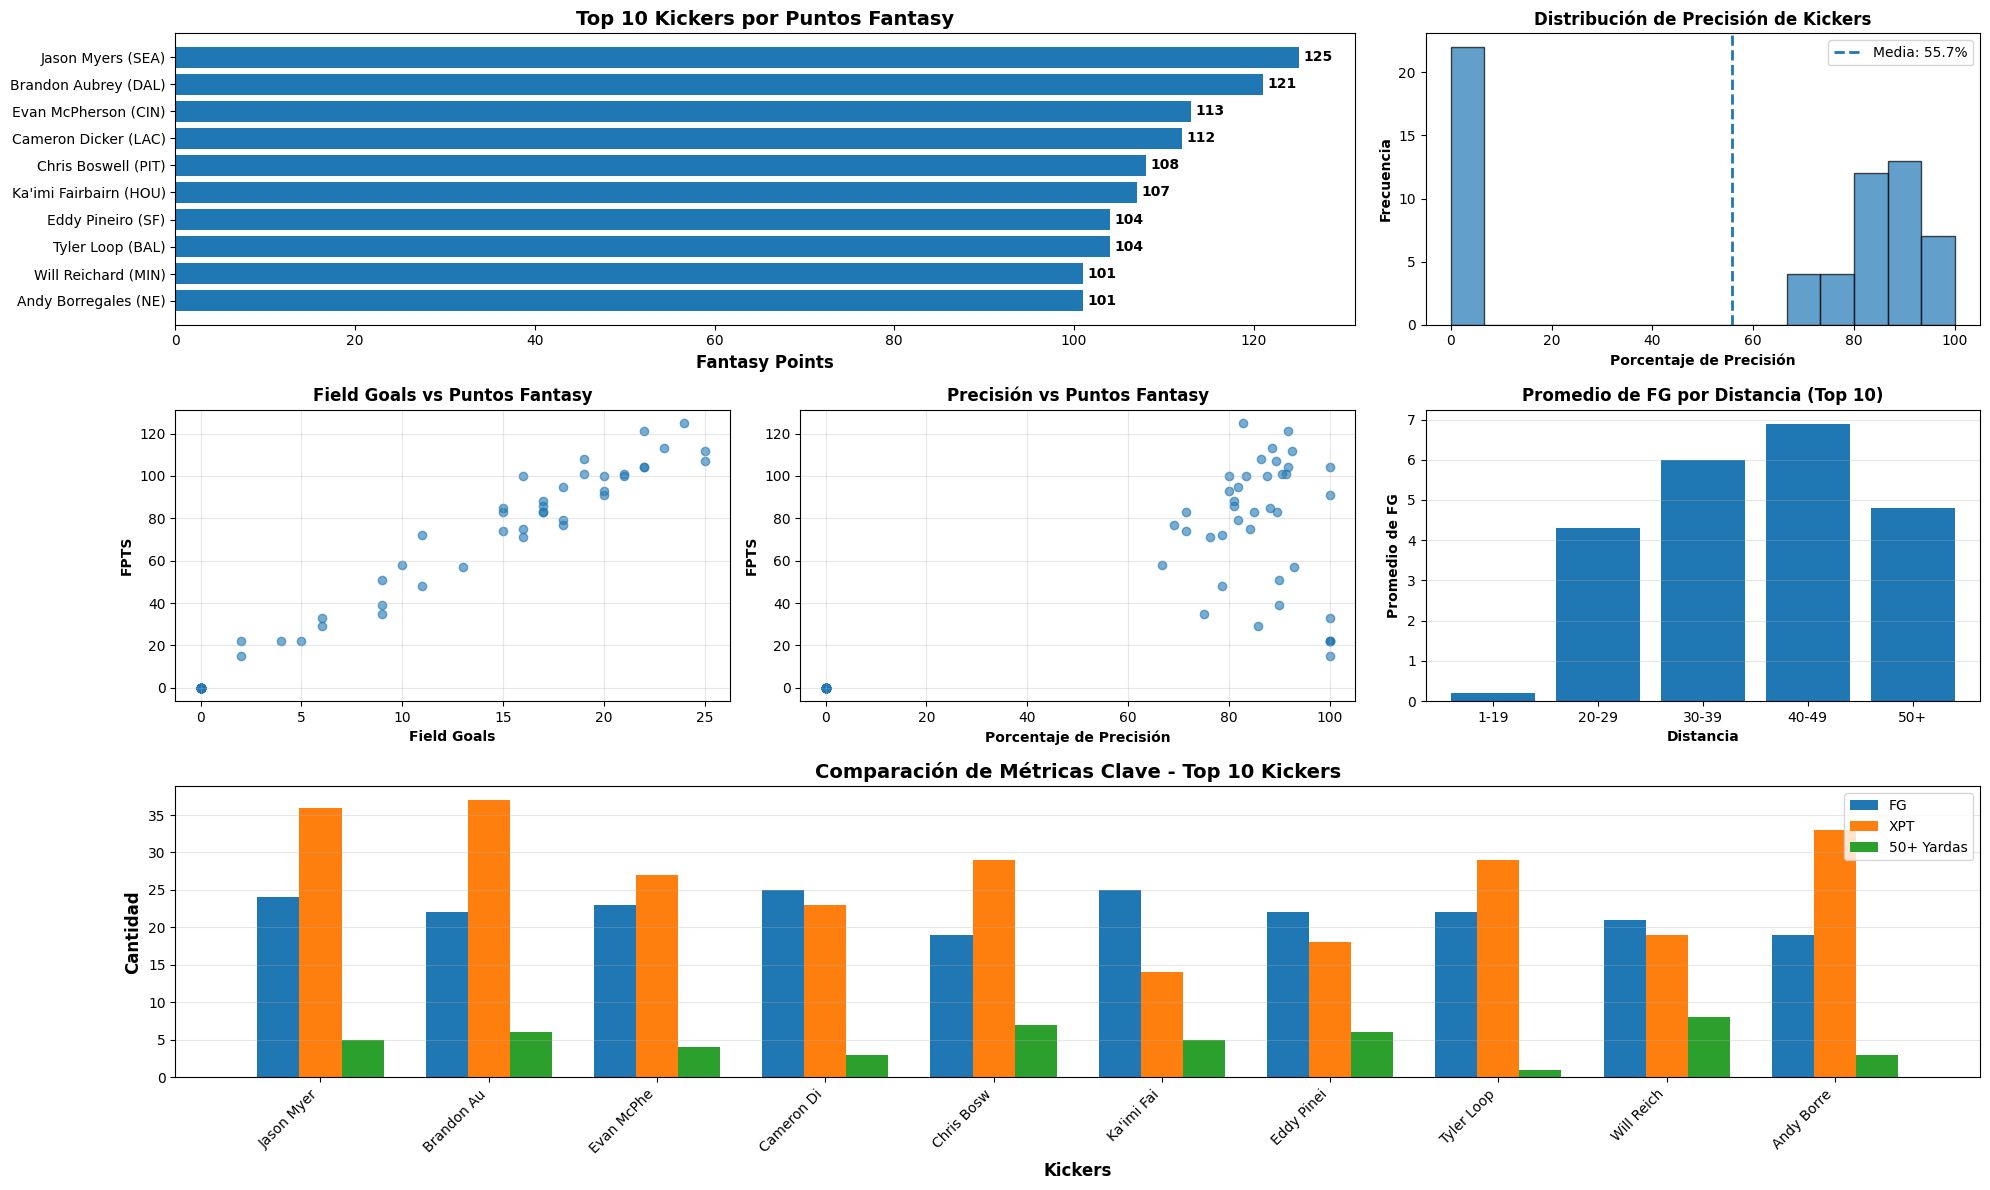

In [15]:
print("\n" + "=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Kicker position")
print("=" * 100)

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :2])
top_k_plot = df_K.nlargest(10, 'FPTS')

ax1.barh(top_k_plot['Player'], top_k_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Kickers por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, v in enumerate(top_k_plot['FPTS']):
    ax1.text(v + 0.5, i, f'{v:.0f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[0, 2])

ax2.hist(df_K['PCT'], bins=15, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Porcentaje de Precisión', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de Precisión de Kickers', fontsize=12, fontweight='bold')

mean_pct = df_K['PCT'].mean()
ax2.axvline(mean_pct, linestyle='--', linewidth=2, label=f'Media: {mean_pct:.1f}%')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])

ax3.scatter(df_K['FG'], df_K['FPTS'], alpha=0.6)
ax3.set_xlabel('Field Goals', fontsize=10, fontweight='bold')
ax3.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax3.set_title('Field Goals vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

ax4 = fig.add_subplot(gs[1, 1])

ax4.scatter(df_K['PCT'], df_K['FPTS'], alpha=0.6)
ax4.set_xlabel('Porcentaje de Precisión', fontsize=10, fontweight='bold')
ax4.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax4.set_title('Precisión vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(gs[1, 2])

top_10_k = df_K.nlargest(10, 'FPTS')
distance_data = top_10_k[['1-19', '20-29', '30-39', '40-49', '50+']].mean()

ax5.bar(distance_data.index, distance_data.values)
ax5.set_xlabel('Distancia', fontsize=10, fontweight='bold')
ax5.set_ylabel('Promedio de FG', fontsize=10, fontweight='bold')
ax5.set_title('Promedio de FG por Distancia (Top 10)', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

ax6 = fig.add_subplot(gs[2, :])

x = np.arange(len(top_10_k))
width = 0.25

ax6.bar(x - width, top_10_k['FG'], width, label='FG')
ax6.bar(x,         top_10_k['XPT'], width, label='XPT')
ax6.bar(x + width, top_10_k['50+'], width, label='50+ Yardas')

ax6.set_xlabel('Kickers', fontsize=12, fontweight='bold')
ax6.set_ylabel('Cantidad', fontsize=12, fontweight='bold')
ax6.set_title('Comparación de Métricas Clave - Top 10 Kickers', fontsize=14, fontweight='bold')

ax6.set_xticks(x)
ax6.set_xticklabels([p.split('(')[0].strip()[:10] for p in top_10_k['Player']], 
                    rotation=45, ha='right')

ax6.legend()
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



ANÁLISIS EXPLORATORIO DE DATOS - Quarterback Position


d:\Windows Apps\Extra storing\DraftFantasy\.venv\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
d:\Windows Apps\Extra storing\DraftFantasy\.venv\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


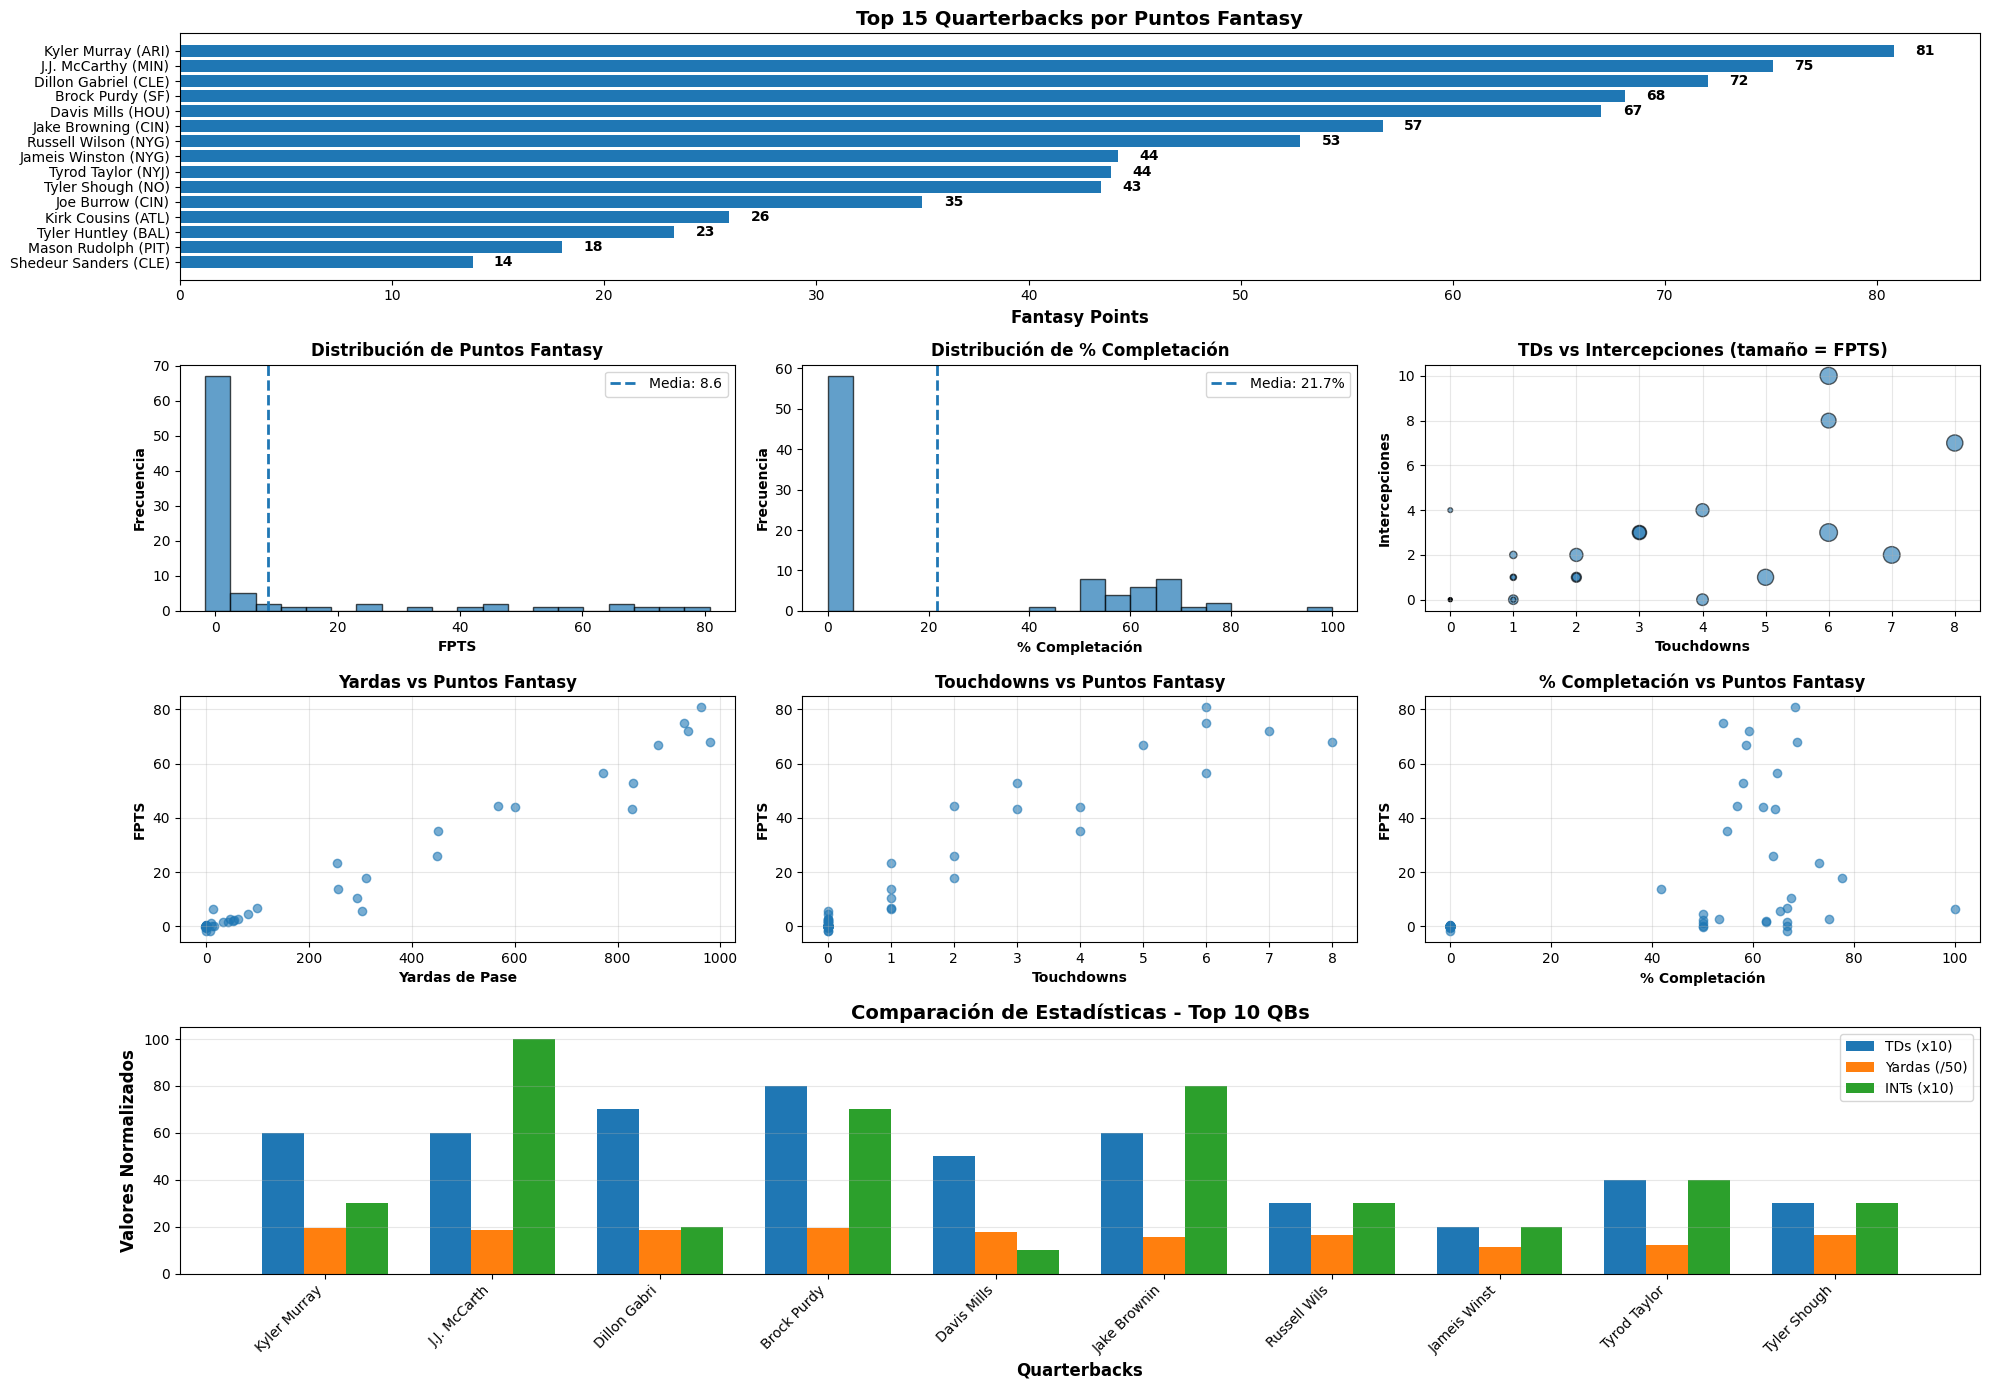

In [20]:
cols_numeric = ["FPTS", "FPTS/G", "CMP", "ATT", "YDS", "TD", "INT", "PCT"]

for col in cols_numeric:
    df_QB[col] = pd.to_numeric(df_QB[col], errors="coerce")

df_QB = df_QB.dropna(subset=["FPTS", "YDS", "TD", "INT"])

print("\n" + "=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Quarterback Position")
print("=" * 100)

fig = plt.figure(figsize=(20, 14))
gs = GridSpec(4, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
top_qb_plot = df_QB.nlargest(15, 'FPTS')

ax1.barh(top_qb_plot['Player'], top_qb_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Quarterbacks por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, v in enumerate(top_qb_plot['FPTS']):
    ax1.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])

ax2.hist(df_QB['FPTS'], bins=20, edgecolor='black', alpha=0.7)
ax2.set_xlabel('FPTS', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de Puntos Fantasy', fontsize=12, fontweight='bold')

mean_fpts = df_QB['FPTS'].mean()
ax2.axvline(mean_fpts, linestyle='--', linewidth=2, label=f'Media: {mean_fpts:.1f}')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1])

ax3.hist(df_QB['PCT'], bins=20, edgecolor='black', alpha=0.7)
ax3.set_xlabel('% Completación', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax3.set_title('Distribución de % Completación', fontsize=12, fontweight='bold')

mean_pct = df_QB['PCT'].mean()
ax3.axvline(mean_pct, linestyle='--', linewidth=2, label=f'Media: {mean_pct:.1f}%')
ax3.legend()

ax4 = fig.add_subplot(gs[1, 2])

sizes = df_QB['FPTS'].fillna(0) * 2
ax4.scatter(df_QB['TD'], df_QB['INT'], s=sizes, alpha=0.6, edgecolors='black')

ax4.set_xlabel('Touchdowns', fontsize=10, fontweight='bold')
ax4.set_ylabel('Intercepciones', fontsize=10, fontweight='bold')
ax4.set_title('TDs vs Intercepciones (tamaño = FPTS)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(gs[2, 0])

ax5.scatter(df_QB['YDS'], df_QB['FPTS'], alpha=0.6)
ax5.set_xlabel('Yardas de Pase', fontsize=10, fontweight='bold')
ax5.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax5.set_title('Yardas vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])

ax6.scatter(df_QB['TD'], df_QB['FPTS'], alpha=0.6)
ax6.set_xlabel('Touchdowns', fontsize=10, fontweight='bold')
ax6.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax6.set_title('Touchdowns vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

ax7 = fig.add_subplot(gs[2, 2])

ax7.scatter(df_QB['PCT'], df_QB['FPTS'], alpha=0.6)
ax7.set_xlabel('% Completación', fontsize=10, fontweight='bold')
ax7.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax7.set_title('% Completación vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)

ax8 = fig.add_subplot(gs[3, :])

top_10_qb = df_QB.nlargest(10, 'FPTS')

x = np.arange(len(top_10_qb))
width = 0.25

td_norm = top_10_qb['TD'] * 10
yds_norm = top_10_qb['YDS'] / 50
int_norm = top_10_qb['INT'] * 10

ax8.bar(x - width, td_norm, width, label='TDs (x10)')
ax8.bar(x, yds_norm, width, label='Yardas (/50)')
ax8.bar(x + width, int_norm, width, label='INTs (x10)')

ax8.set_xlabel('Quarterbacks', fontsize=12, fontweight='bold')
ax8.set_ylabel('Valores Normalizados', fontsize=12, fontweight='bold')
ax8.set_title('Comparación de Estadísticas - Top 10 QBs', fontsize=14, fontweight='bold')

ax8.set_xticks(x)
ax8.set_xticklabels(
    [p.split('(')[0].strip()[:12] for p in top_10_qb['Player']],
    rotation=45, ha='right'
)

ax8.legend()
ax8.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



ANÁLISIS EXPLORATORIO DE DATOS - Running back Position


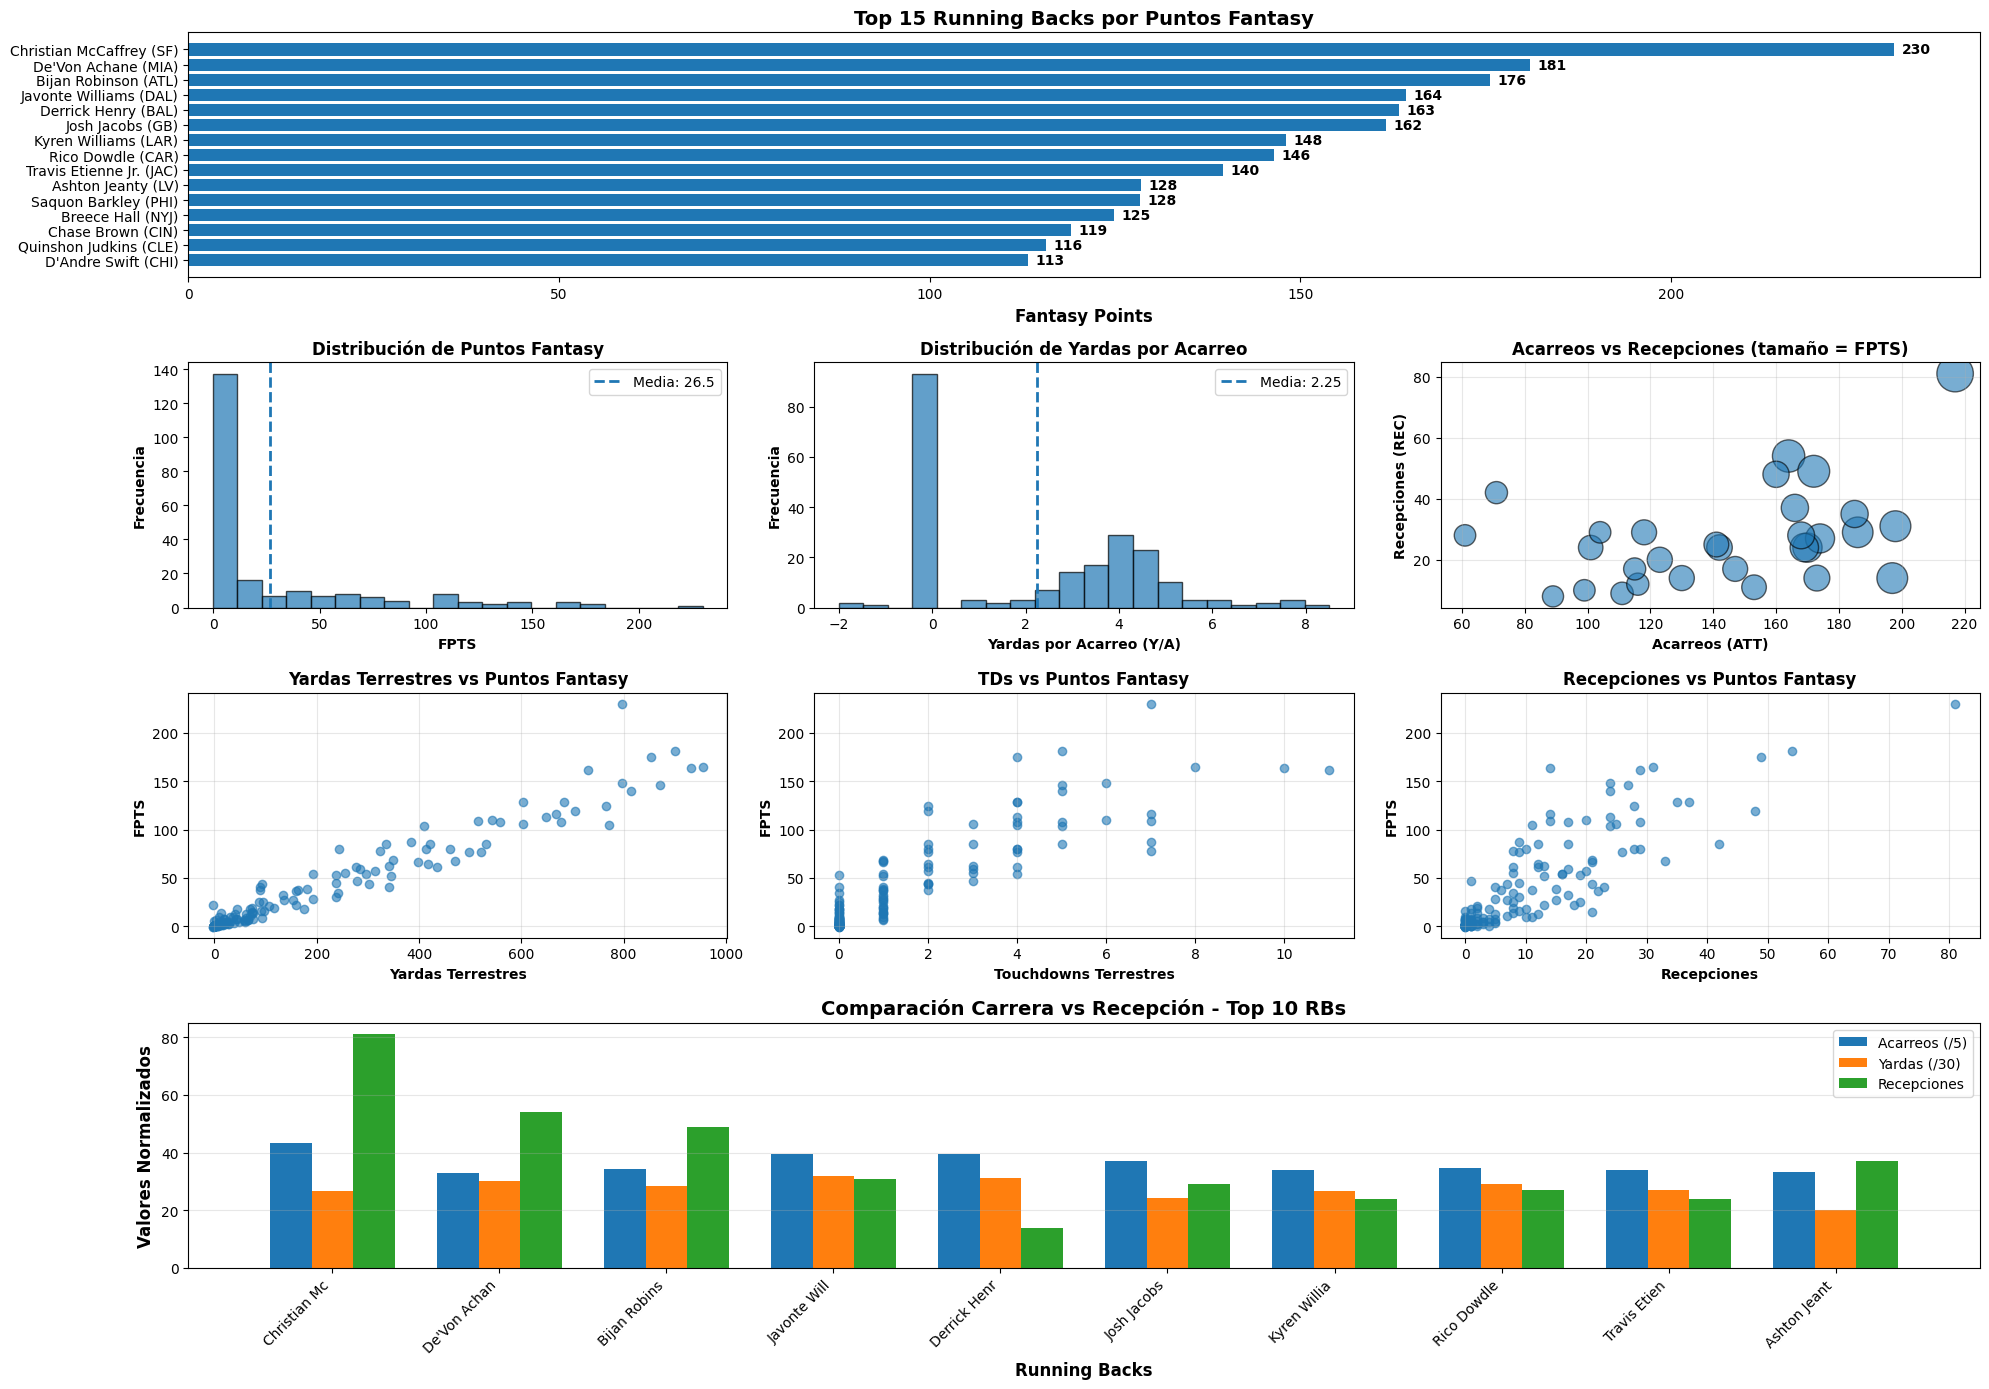

In [25]:
print("\n" + "=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Running back Position")
print("=" * 100)

numeric_cols_rb = ["FPTS", "FPTS/G", "ATT", "YDS", "TD", "REC", "Y/A"]
for col in numeric_cols_rb:
    df_RB[col] = pd.to_numeric(df_RB[col], errors="coerce")

df_RB = df_RB.dropna(subset=["FPTS", "YDS", "TD"])

fig = plt.figure(figsize=(20, 14))
gs = GridSpec(4, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
top_rb_plot = df_RB.nlargest(15, 'FPTS')

ax1.barh(top_rb_plot['Player'], top_rb_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Running Backs por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, v in enumerate(top_rb_plot['FPTS']):
    ax1.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])

ax2.hist(df_RB['FPTS'], bins=20, edgecolor='black', alpha=0.7)
ax2.set_xlabel('FPTS', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de Puntos Fantasy', fontsize=12, fontweight='bold')

mean_fpts = df_RB['FPTS'].mean()
ax2.axvline(mean_fpts, linestyle='--', linewidth=2, label=f'Media: {mean_fpts:.1f}')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1])

ax3.hist(df_RB['Y/A'], bins=20, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Yardas por Acarreo (Y/A)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax3.set_title('Distribución de Yardas por Acarreo', fontsize=12, fontweight='bold')

mean_ya = df_RB['Y/A'].mean()
ax3.axvline(mean_ya, linestyle='--', linewidth=2, label=f'Media: {mean_ya:.2f}')
ax3.legend()

ax4 = fig.add_subplot(gs[1, 2])

top_30_rb = df_RB.nlargest(30, 'FPTS')

sizes = top_30_rb['FPTS'].fillna(0) * 3

ax4.scatter(top_30_rb['ATT'], top_30_rb['REC'], s=sizes, alpha=0.6, edgecolors='black')
ax4.set_xlabel('Acarreos (ATT)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Recepciones (REC)', fontsize=10, fontweight='bold')
ax4.set_title('Acarreos vs Recepciones (tamaño = FPTS)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(gs[2, 0])

ax5.scatter(df_RB['YDS'], df_RB['FPTS'], alpha=0.6)
ax5.set_xlabel('Yardas Terrestres', fontsize=10, fontweight='bold')
ax5.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax5.set_title('Yardas Terrestres vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])

ax6.scatter(df_RB['TD'], df_RB['FPTS'], alpha=0.6)
ax6.set_xlabel('Touchdowns Terrestres', fontsize=10, fontweight='bold')
ax6.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax6.set_title('TDs vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

ax7 = fig.add_subplot(gs[2, 2])

ax7.scatter(df_RB['REC'], df_RB['FPTS'], alpha=0.6)
ax7.set_xlabel('Recepciones', fontsize=10, fontweight='bold')
ax7.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax7.set_title('Recepciones vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)

ax8 = fig.add_subplot(gs[3, :])

top_10_rb = df_RB.nlargest(10, 'FPTS')

x = np.arange(len(top_10_rb))
width = 0.25

att_norm = top_10_rb['ATT'] / 5
yds_norm = top_10_rb['YDS'] / 30
rec_norm = top_10_rb['REC']

ax8.bar(x - width, att_norm, width, label='Acarreos (/5)')
ax8.bar(x, yds_norm, width, label='Yardas (/30)')
ax8.bar(x + width, rec_norm, width, label='Recepciones')

ax8.set_xlabel('Running Backs', fontsize=12, fontweight='bold')
ax8.set_ylabel('Valores Normalizados', fontsize=12, fontweight='bold')
ax8.set_title('Comparación Carrera vs Recepción - Top 10 RBs', fontsize=14, fontweight='bold')

ax8.set_xticks(x)
ax8.set_xticklabels(
    [p.split('(')[0].strip()[:12] for p in top_10_rb['Player']],
    rotation=45, ha='right'
)

ax8.legend()
ax8.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


ANÁLISIS EXPLORATORIO DE DATOS - Tight end Position


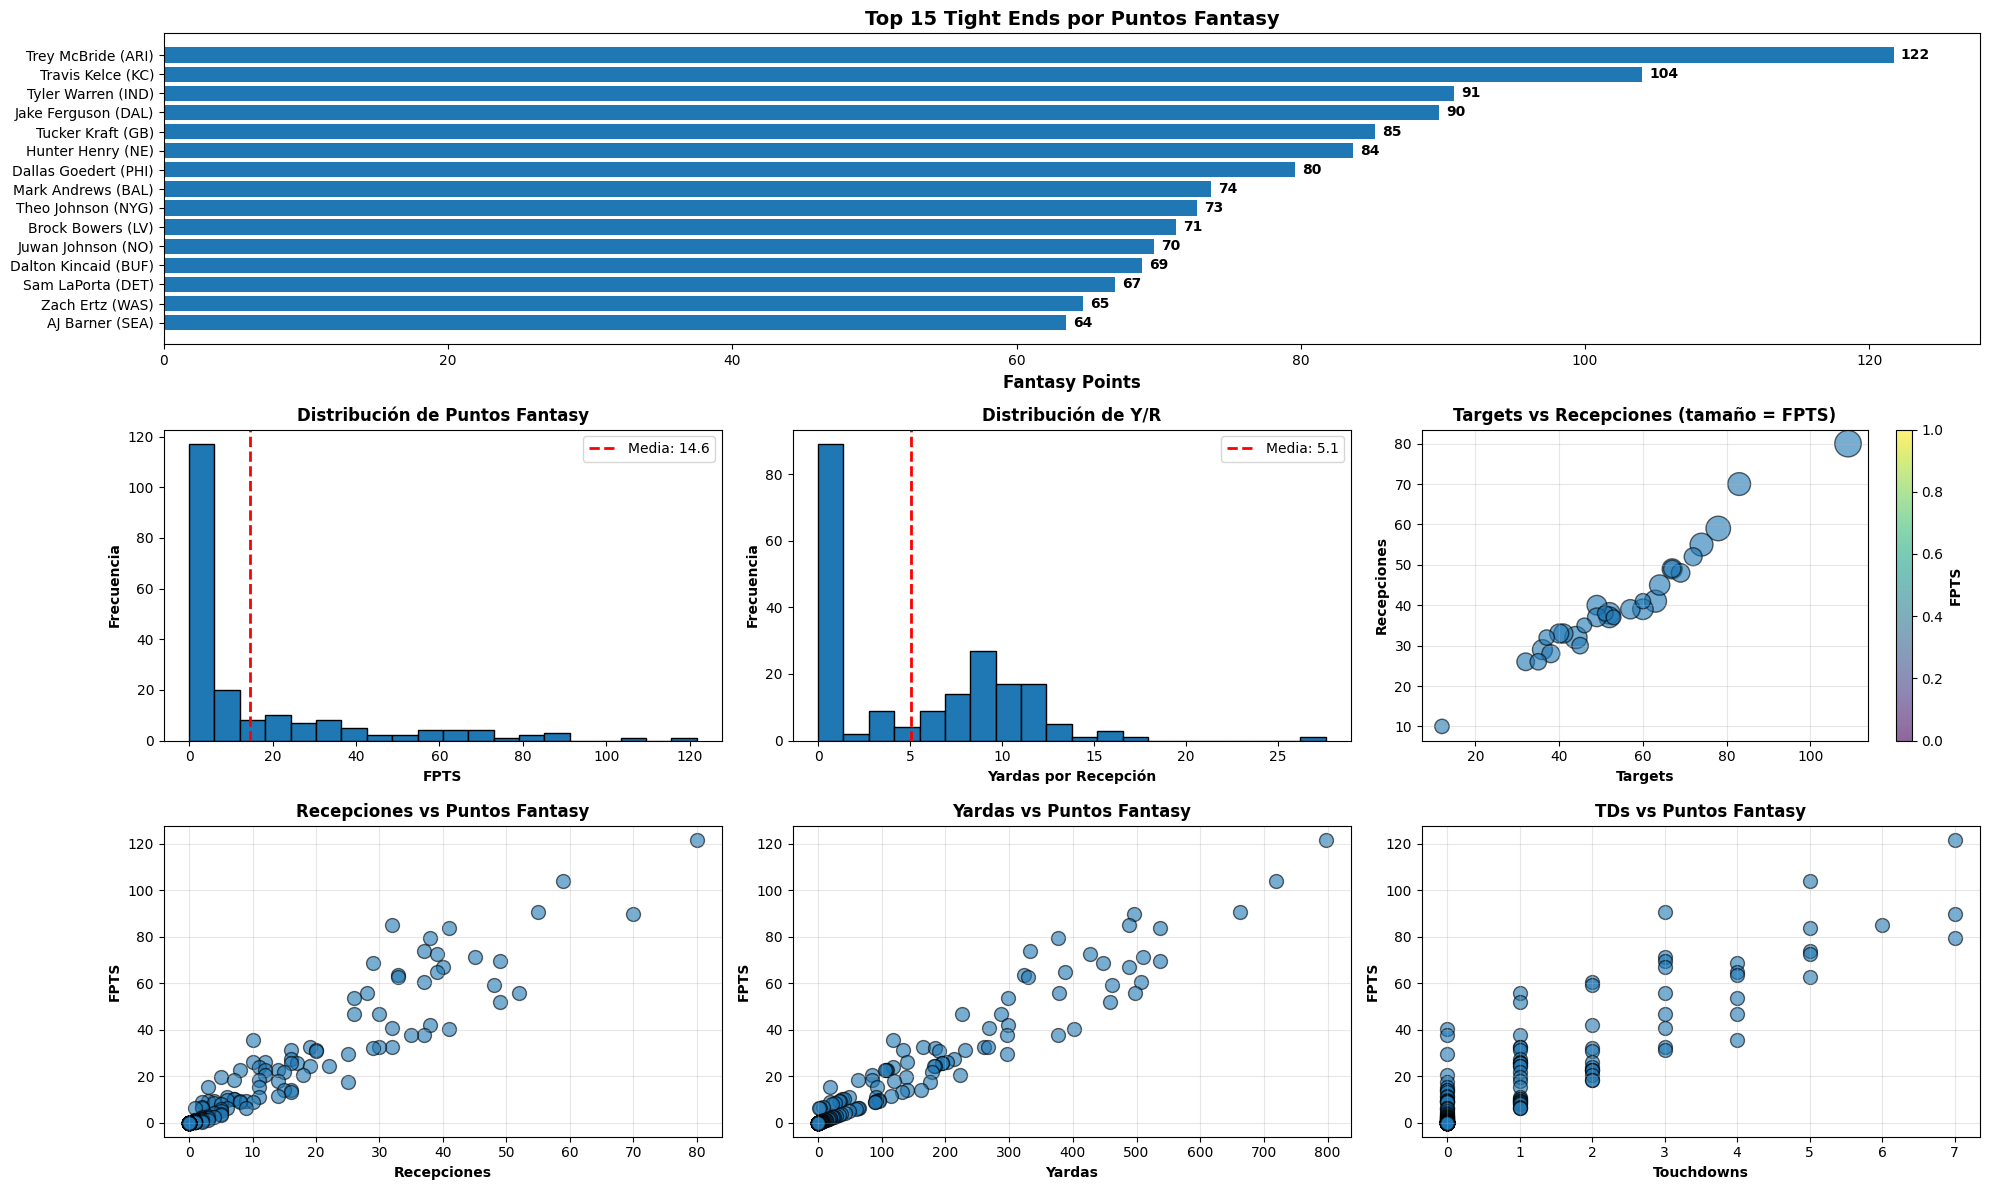

In [27]:
print("\n" + "=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Tight end Position")
print("=" * 100)

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
top_te_plot = df_TE.nlargest(15, 'FPTS')
ax1.barh(top_te_plot['Player'], top_te_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Tight Ends por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(top_te_plot['FPTS']):
    ax1.text(v + 0.5, i, f'{v:.0f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(df_TE['FPTS'], bins=20, edgecolor='black')
ax2.set_xlabel('FPTS', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de Puntos Fantasy', fontsize=12, fontweight='bold')
ax2.axvline(df_TE['FPTS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_TE["FPTS"].mean():.1f}')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(df_TE['Y/R'], bins=20, edgecolor='black')
ax3.set_xlabel('Yardas por Recepción', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax3.set_title('Distribución de Y/R', fontsize=12, fontweight='bold')
ax3.axvline(df_TE['Y/R'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_TE["Y/R"].mean():.1f}')
ax3.legend()

ax4 = fig.add_subplot(gs[1, 2])
top_30_te = df_TE.nlargest(30, 'FPTS')

scatter4 = ax4.scatter(
    top_30_te['TGT'], 
    top_30_te['REC'], 
    s=top_30_te['FPTS'] * 3,
    alpha=0.6,
    edgecolors='black'
)

ax4.set_xlabel('Targets', fontsize=10, fontweight='bold')
ax4.set_ylabel('Recepciones', fontsize=10, fontweight='bold')
ax4.set_title('Targets vs Recepciones (tamaño = FPTS)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

cbar = plt.colorbar(scatter4, ax=ax4)
cbar.set_label('FPTS', fontsize=10, fontweight='bold')

ax5 = fig.add_subplot(gs[2, 0])
ax5.scatter(df_TE['REC'], df_TE['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax5.set_xlabel('Recepciones', fontsize=10, fontweight='bold')
ax5.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax5.set_title('Recepciones vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(df_TE['YDS'], df_TE['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax6.set_xlabel('Yardas', fontsize=10, fontweight='bold')
ax6.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax6.set_title('Yardas vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

ax7 = fig.add_subplot(gs[2, 2])
ax7.scatter(df_TE['TD'], df_TE['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax7.set_xlabel('Touchdowns', fontsize=10, fontweight='bold')
ax7.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax7.set_title('TDs vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)

plt.tight_layout()
plt.show()



ANÁLISIS EXPLORATORIO DE DATOS - Wide receiver Position


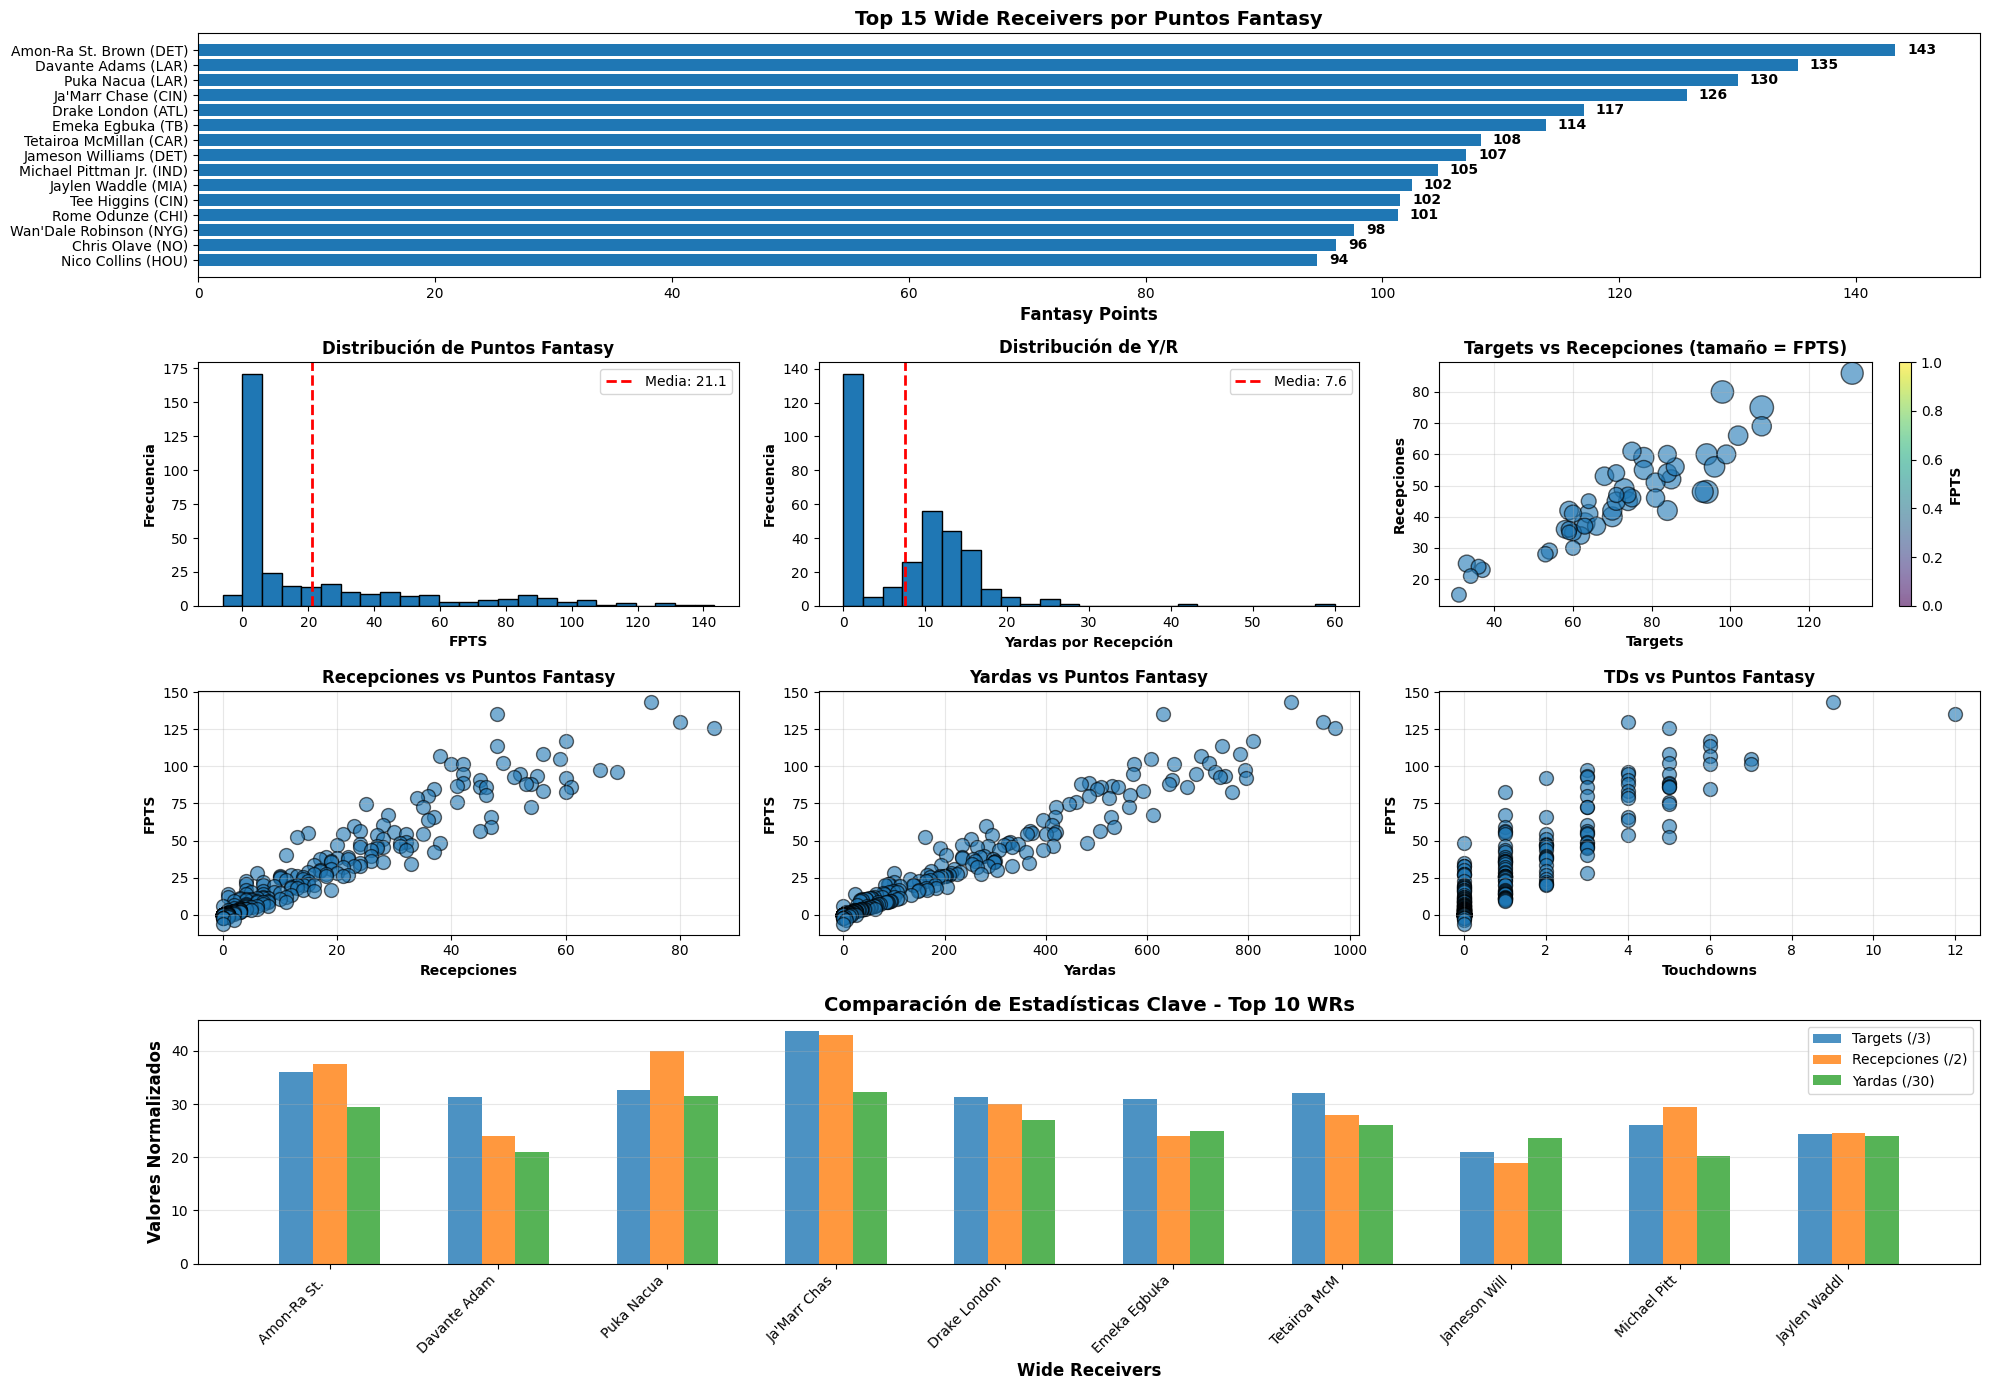

In [7]:
print("\n" + "=" * 100)
print("ANÁLISIS EXPLORATORIO DE DATOS - Wide receiver Position")
print("=" * 100)

cols_numeric = ['TGT', 'REC', 'YDS', 'TD', 'FPTS', 'FPTS/G', 'Y/R']
for col in cols_numeric:
    if col in df_WR.columns:
        df_WR[col] = pd.to_numeric(df_WR[col], errors='coerce')

df_WR = df_WR.dropna(subset=['YDS', 'FPTS', 'REC', 'TGT', 'TD'])

fig = plt.figure(figsize=(20, 14))
gs = GridSpec(4, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
top_wr_plot = df_WR.nlargest(15, 'FPTS')
ax1.barh(top_wr_plot['Player'], top_wr_plot['FPTS'])
ax1.set_xlabel('Fantasy Points', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Wide Receivers por Puntos Fantasy', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(top_wr_plot['FPTS']):
    ax1.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(df_WR['FPTS'], bins=25, edgecolor='black')
ax2.set_xlabel('FPTS', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax2.set_title('Distribución de Puntos Fantasy', fontsize=12, fontweight='bold')
ax2.axvline(df_WR['FPTS'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Media: {df_WR["FPTS"].mean():.1f}')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(df_WR['Y/R'], bins=25, edgecolor='black')
ax3.set_xlabel('Yardas por Recepción', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax3.set_title('Distribución de Y/R', fontsize=12, fontweight='bold')
ax3.axvline(df_WR['Y/R'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Media: {df_WR["Y/R"].mean():.1f}')
ax3.legend()

ax4 = fig.add_subplot(gs[1, 2])
top_50_wr = df_WR.nlargest(50, 'FPTS')

scatter4 = ax4.scatter(
    top_50_wr['TGT'],
    top_50_wr['REC'],
    s=top_50_wr['FPTS'] * 2,
    alpha=0.6,
    edgecolors='black'
)

ax4.set_xlabel('Targets', fontsize=10, fontweight='bold')
ax4.set_ylabel('Recepciones', fontsize=10, fontweight='bold')
ax4.set_title('Targets vs Recepciones (tamaño = FPTS)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

cbar = plt.colorbar(scatter4, ax=ax4)
cbar.set_label('FPTS', fontsize=10, fontweight='bold')

ax5 = fig.add_subplot(gs[2, 0])
ax5.scatter(df_WR['REC'], df_WR['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax5.set_xlabel('Recepciones', fontsize=10, fontweight='bold')
ax5.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax5.set_title('Recepciones vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(df_WR['YDS'], df_WR['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax6.set_xlabel('Yardas', fontsize=10, fontweight='bold')
ax6.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax6.set_title('Yardas vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

ax7 = fig.add_subplot(gs[2, 2])
ax7.scatter(df_WR['TD'], df_WR['FPTS'], alpha=0.6, s=100, edgecolors='black')
ax7.set_xlabel('Touchdowns', fontsize=10, fontweight='bold')
ax7.set_ylabel('FPTS', fontsize=10, fontweight='bold')
ax7.set_title('TDs vs Puntos Fantasy', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)

ax8 = fig.add_subplot(gs[3, :])
top_10_wr = df_WR.nlargest(10, 'FPTS')

x = np.arange(len(top_10_wr))
width = 0.2

tgt_norm = top_10_wr['TGT'] / 3
rec_norm = top_10_wr['REC'] / 2
yds_norm = top_10_wr['YDS'] / 30

ax8.bar(x - width, tgt_norm, width, label='Targets (/3)', alpha=0.8)
ax8.bar(x, rec_norm, width, label='Recepciones (/2)', alpha=0.8)
ax8.bar(x + width, yds_norm, width, label='Yardas (/30)', alpha=0.8)

ax8.set_xlabel('Wide Receivers', fontsize=12, fontweight='bold')
ax8.set_ylabel('Valores Normalizados', fontsize=12, fontweight='bold')
ax8.set_title('Comparación de Estadísticas Clave - Top 10 WRs', fontsize=14, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels([p.split('(')[0].strip()[:12] for p in top_10_wr['Player']],
                    rotation=45, ha='right')
ax8.legend()
ax8.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()